In [1]:
import warnings
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter("ignore")
plt.rcParams['font.size'] = 14.0
sns.set(rc={'figure.figsize':(10, 7)})

In [2]:
df = pd.read_csv('./data/file.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
print(f"Columns: {df.shape[1]}, rows: {df.shape[0]}")

Columns: 9, rows: 1987


In [4]:
df = df.rename(columns={"Employment Type": "EmploymentType"})

In [5]:
#Change categorical data to int

le = LabelEncoder()
le.fit(df.EmploymentType)
df['EmploymentType'] = le.transform(df.EmploymentType)

le.fit(df.GraduateOrNot)
df['GraduateOrNot'] = le.transform(df.GraduateOrNot)

le.fit(df.FrequentFlyer)
df['FrequentFlyer'] = le.transform(df.FrequentFlyer)

le.fit(df.EverTravelledAbroad)
df['EverTravelledAbroad'] = le.transform(df.EverTravelledAbroad)

In [6]:
df = df.reset_index(drop=True)

In [7]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [8]:
df.nunique()

Age                    11
EmploymentType          2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   EmploymentType       1987 non-null   int32
 2   GraduateOrNot        1987 non-null   int32
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int32
 7   EverTravelledAbroad  1987 non-null   int32
 8   TravelInsurance      1987 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 108.8 KB


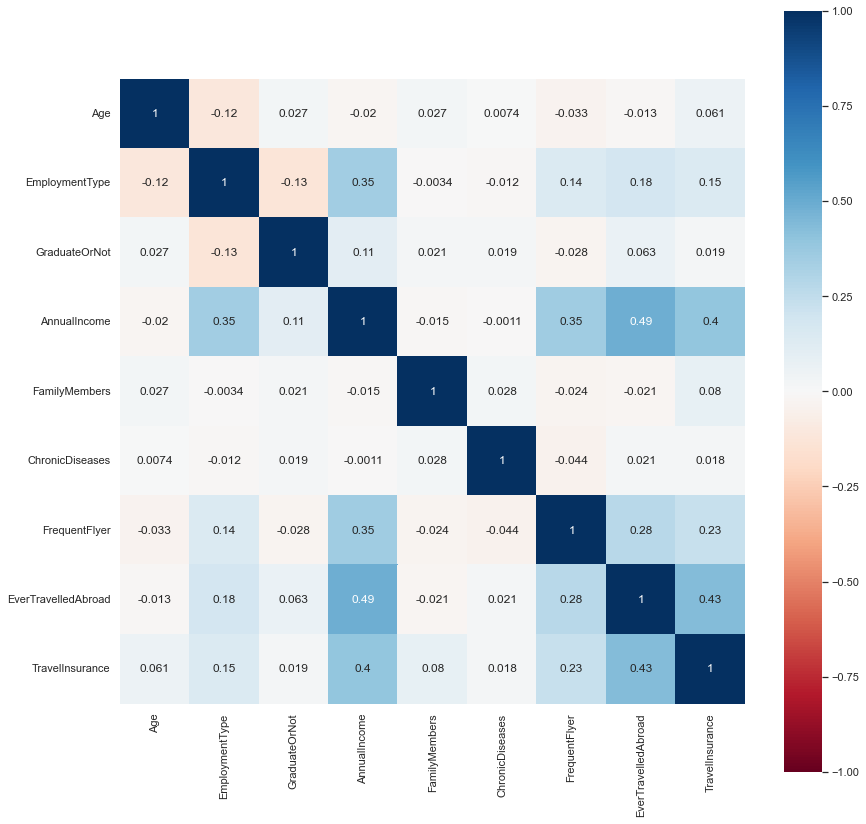

In [10]:
f, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='RdBu', square=True)

In [11]:
df_for_questions = df[['Age', 'AnnualIncome', 'FamilyMembers', 'TravelInsurance']]

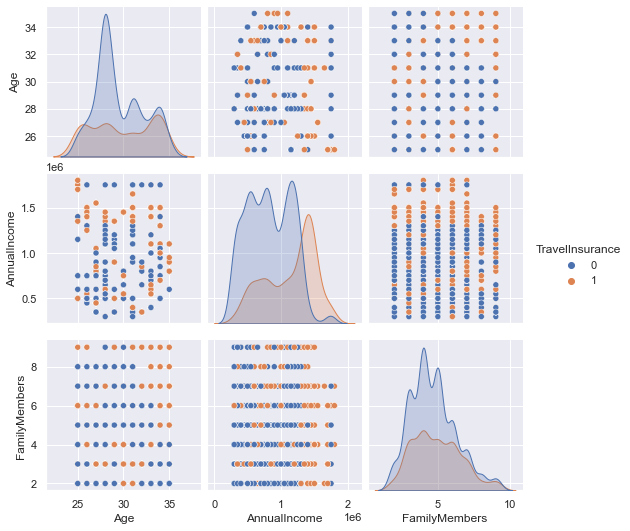

In [12]:
sns.pairplot(df_for_questions, hue="TravelInsurance")

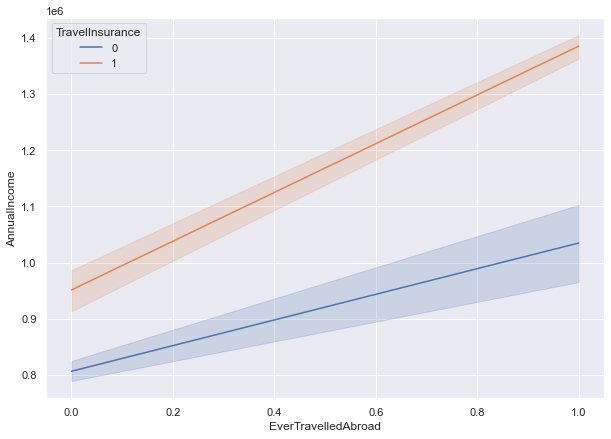

In [13]:
sns.lineplot(data=df, x="EverTravelledAbroad", y="AnnualIncome", hue='TravelInsurance', sizes = (20, 20))

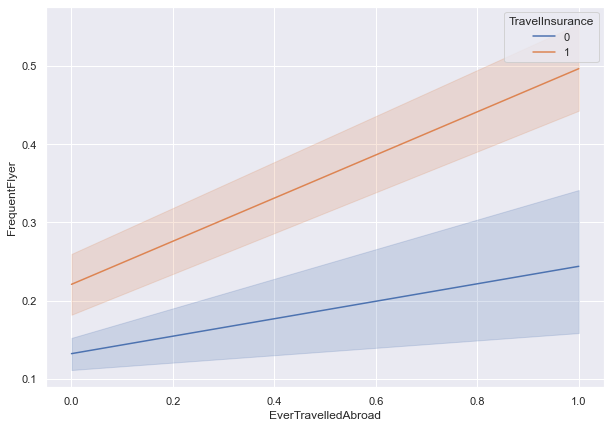

In [14]:
sns.lineplot(data=df, x="EverTravelledAbroad", y="FrequentFlyer", hue='TravelInsurance', sizes = (20, 20))

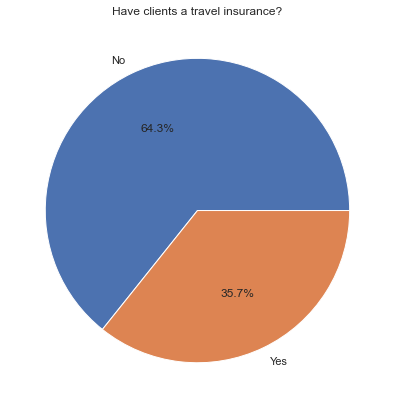

In [15]:
# Pie chart
figure, location = plt.subplots(figsize=(7, 7))
labels = ['No', 'Yes']
sizes = [len(df[df['TravelInsurance'] == 0]), len(df[df['TravelInsurance'] == 1])]
plt.title("Have clients a travel insurance?")
location.pie(sizes, labels=labels, autopct='%.1f%%')
plt.show()

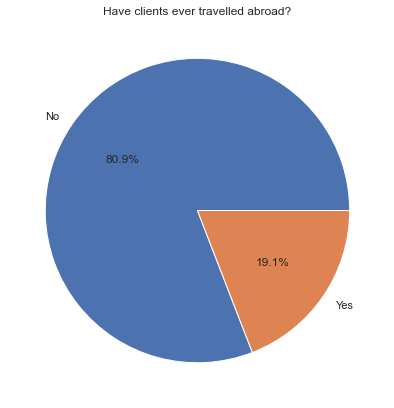

In [16]:
# Pie chart
figure, location = plt.subplots(figsize=(7, 7))
labels = ['No', 'Yes']
sizes = [len(df[df['EverTravelledAbroad'] == 0]), len(df[df['EverTravelledAbroad'] == 1])]
plt.title("Have clients ever travelled abroad?")
location.pie(sizes, labels=labels, autopct='%.1f%%')
plt.show()

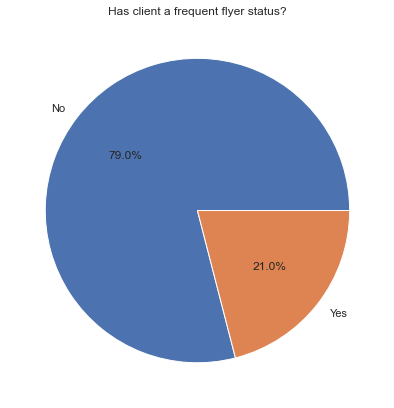

In [17]:
# Pie chart
figure, location = plt.subplots(figsize=(7, 7))
labels = ['No', 'Yes']
sizes = [len(df[df['FrequentFlyer'] == 0]), len(df[df['FrequentFlyer'] == 1])]
plt.title("Has client a frequent flyer status?")
location.pie(sizes, labels=labels, autopct='%.1f%%')
plt.show()